In [1]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 9.18 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.


In [2]:
%cd fastText/
!pip install .

/Users/takumi-hiraoka/Desktop/infovis/B-Hiyayako/word2vec/fastText
Processing /Users/takumi-hiraoka/Desktop/infovis/B-Hiyayako/word2vec/fastText
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-macosx_10_16_x86_64.whl size=342212 sha256=b451cd7ba22d6d9ae191ea78f66578b37306279dc3b0233306ae6778154d4fca
  Stored in directory: /private/var/folders/kh/5y_kd0d96ks68gqyzxd2c0480000gn/T/pip-ephem-wheel-cache-mc14i9ev/wheels/81/98/f2/c64a76921a1e921d6fbaef59a5fcc9a71c260c1df19d3e7b38
Successfully built fasttext
  Attempting uninstall: fasttext
    Found existing installation: fasttext 0.9.2
    Uninstalling fasttext-0.9.2:
      Successfully uninstalled fasttext-0.9.2


In [3]:
#https://drive.google.com/file/d/1OigARMJVJCpiVHXotcJschuN2WifTBYo/view?usp=sharing
%cd /content/
!pip install gdown
!gdown --id "1OigARMJVJCpiVHXotcJschuN2WifTBYo"

[Errno 2] No such file or directory: '/content/'
/Users/takumi-hiraoka/Desktop/infovis/B-Hiyayako/word2vec/fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14262 sha256=970085c853890650c764e8c26afbf4144c9e87716ecebfa2a122104b9dc34321
  Stored in directory: /Users/takumi-hiraoka/Library/Caches/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
Downloading...
From: https://drive.google.com/uc?id=1OigARMJVJCpiVHXotcJschuN2WifTBYo
To: /Users/takumi-hiraoka/Desktop/infovis/B-Hiyayako/word2vec/fastText/cc.ja.300.bin.gz
100%|██████████████████████████████████████| 4.49G/4.49G [03:13<00:00, 23.2MB/s]


In [4]:
!gzip -d cc.ja.300.bin.gz

In [5]:
import fasttext
import fasttext.util
ft = fasttext.load_model('cc.ja.300.bin')

In [6]:
ft.get_dimension()

300

In [7]:
# coding:utf-8
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

list = [('プライム', 12), ('セントラルレジデンス', 12), ('クリオレジダンス', 12), ('マークス', 12), ('ツイン', 12), ('ガーラグランディ', 12), ('スタイルハウス', 12), ('アピス', 12), ('プレスタイル', 12), ('ファーストシーン', 12), ('ルッソ', 12), ('モアグランデ', 12), ('グランシャトレ', 12), ('パルテール', 12), ('ハイセレサ', 12), ('コンフォート', 12), ('エルフラット', 12), ('ドルフ', 12), ('アーバンビュー', 12), ('クィーンシティ', 12), ('リシェ', 12), ('カインドステージ', 12), ('ヴェルレージュ', 12), ('ビューネ', 12), ('ロイヤルガーデン', 12), ('ポート', 12), ('グランデージ', 12), ('キャステール', 12), ('サンクレスト', 12), ('センチュリーマンション', 12), ('オリエンタル', 12), ('ブリリアンス', 12), ('コープタウン', 12), ('ハイマート', 12), ('ウィンベルソロ', 12), ('ウイング', 12), ('シティコーポ', 12), ('ダイカンプラザシティ', 12), ('ジュネス', 12), ('オリエント', 12), ('メゾンド', 12), ('ロイアルハイツ', 12), ('ウィスタリアマンション', 12), ('ファミリーマンション', 12), ('ハ', 12), ('ニ', 12), ('ザサンメゾン', 13), ('ルフォンリブレ', 13), ('ミルーナヒルズ', 13), ('ゼームス', 13), ('ベイ', 13), ('ディアスタ', 13), ('ヒルトップレジデンス', 13), ('オーベルグランディオ', 13), ('ファインレジデンス', 13), ('アーバンパレス', 13), ('ガーデンフォレスト', 13), ('パレソレイユ', 13), ('コンファーレ', 13), ('シャルムコート', 13), ('パークウエスト', 13), ('パークステージ', 13), ('メゾンドヴィレ', 13), ('ラフィネ', 13), ('ビラ', 13), ('ドエルプレステージ', 13), ('トーカン', 13), ('オリンポス', 13), ('ユニアス', 13), ('ト', 13), ('ヴェルドミール', 13), ('アーバンハイム', 13), ('ダイヤモンドパレス', 13), ('パレロワイヤル', 13), ('シーアイハイツ', 13), ('リレント', 13), ('ニューウェルハイツ', 13), ('ウィーンハイツ', 13), ('コーヅ', 13), ('ニューライフマンション', 13), ('サンコーポ', 13), ('ソルフィエスタ', 14), ('ベルジェンド', 14), ('ドゥエ', 14), ('ディアージュ', 14), ('イーストレジデンス', 14), ('クオス', 14), ('ファースト', 14), ('デュオ', 14), ('ル', 14), ('ソレイユ', 14), ('セントラルコート', 14), ('シティオ', 14), ('コニファーコート', 14), ('ライネスハイム', 14), ('ボヌール', 14), ('ナビウス', 14), ('グランステージ', 14), ('エクセレンス', 14), ('クレストコート', 14), ('セブンスターハイツ', 14), ('オリエントコート', 14), ('ビッグ', 14), ('ナショナルコート', 14), ('ファミリータウン', 14), ('ベルハイツ', 14), ('リリーゼ', 15), ('レジェイド', 15), ('レフィール', 15), ('グリーンテラス', 15), ('ノーブル', 15), ('ルネサンス', 15), ('パティオ', 15), ('グレース', 15), ('サーパス', 15), ('イニシアイオ', 15), ('グランベル', 15), ('スタジオデン', 15), ('アプレシティ', 15), ('レクセルプラザ', 15), ('セーナ', 15), ('クレアトール', 15), ('フォレストレイク', 15), ('アクトピア', 15), ('メルシー', 15), ('チュリス', 15), ('エレガンス', 15), ('プロムナード', 15), ('アーバンライフ', 15), ('サンサーラ', 15), ('ゾンネンハイム', 15), ('ハイライン', 15), ('レグゼ', 16), ('ウエリス', 16), ('レジデンシャル', 16), ('ザパークハウスアーバンス', 16), ('パークアベニュー', 16), ('ドム', 16), ('アーバンキャッスル', 16), ('レクシオ', 16), ('メゾネット', 16), ('プリンスハイツ', 16), ('クレスト', 16), ('クレスパリオ', 16), ('シティパリオ', 16), ('ハイラーク', 16), ('レーベンスガルテン', 16), ('プロスペアー', 16), ('ウィン', 16), ('グランエクレール', 16), ('ジョイフル', 16), ('ニューハイム', 16), ('シャンブル', 16), ('ノア', 16), ('サニーコーポ', 16), ('グリーンマンション', 16), ('ハイズ', 17), ('アベニュー', 17), ('ガーデンズ', 17), ('サウスコート', 17), ('エクセルダイア', 17), ('プレジール', 17), ('ヴェルデ', 17), ('パテラ', 17), ('レーベンリヴァーレ', 17), ('シュロス', 17), ('クレアシティ', 17), ('ドメイン', 17), ('ラヴィドール', 17), ('ライオンズヒルズ', 17), ('バームステージ', 17), ('シティプラザ', 17), ('セントラルハイツ', 17), ('モアステージ', 17), ('セントラルマンション', 17), ('リッツハウス', 17), ('マンションヴィップ', 17), ('フラワーホーム', 17), ('ガーラレジデンス', 18), ('スパシエ', 18), ('ザタワー', 18), ('ガーラプレシャス', 18), ('フェルクルールプレスト', 18), ('ヒルサイドテラス', 18), ('アパートメント', 18), ('エコヴィレッジ', 18), ('ジュエル', 18), ('アビテ', 18), ('ラポール', 18), ('プレジャーガーデン', 18), ('マイステージ', 18), ('スカーラ', 18), ('サンライフ', 18), ('タウンハイツ', 18), ('オリンピックマンション', 18), ('ローズハイツ', 18), ('コンド', 18), ('ヴァースクレイシア', 19), ('ヴァレッシア', 19), ('グランフォート', 19), ('パークスクエア', 19), ('アルファグランデ', 19), ('リストレジデンス', 19), ('ロワール', 19), ('パーク', 19), ('カルム', 19), ('ディナスカーラ', 19), ('プリムローズ', 19), ('グランドハイツ', 19), ('ライブタウン', 19), ('モアクレスト', 19), ('エヴァーグリーン', 19), ('ロイヤルプラザ', 19), ('コンドミニアム', 19), ('ラミアール', 19), ('シャトレー', 19), ('ユースフル', 19), ('パラシオン', 19), ('ダイヤハイツ', 19), ('サンライトマンション', 19), ('プラウドタワー', 20), ('グランヴェール', 20), ('クレアシオン', 20), ('ウイングヒルズ', 20), ('グラーサ', 20), ('シティフォルム', 20), ('アクシルコート', 20), ('リーベスト', 20), ('アドリーム', 20), ('パリオ', 20), ('キャッスル', 20), ('パシフィックパレス', 20), ('リライアンス', 20), ('リリエンハイム', 20), ('ノナ', 20), ('ニューライフ', 20), ('タウンホーム', 20), ('パティーナ', 21), ('レックス', 21), ('リリーベル', 21), ('ライオンズグローベル', 21), ('パロス', 21), ('モリス', 21), ('メゾンドール', 21), ('シャルマンコーポ', 21), ('ドムス', 21), ('マリオン', 21), ('ミリオンコート', 21), ('パールマンション', 21), ('コーポビアネーズ', 21), ('サンビューハイツ', 21), ('ディップス', 22), ('ドレッセ', 22), ('ウェリス', 22), ('アクシア', 22), ('グランツ', 22), ('プレステージ', 22), ('ネオマイム', 22), ('ガラシティ', 22), ('アルシオン', 22), ('コアロード', 22), ('パークノヴァ', 22), ('グランフォルム', 22), ('シティコーポパルナス', 22), ('ベルテ', 22), ('ストークマンション', 22), ('ロイヤルマンション', 22), ('ドルミ', 22), ('ハイデンス', 22), ('アパート', 22), ('ガーデンコート', 23), ('レガリス', 23), ('ヴァローレ', 23), ('ログ', 23), ('ガーデンテラス', 23), ('グランコート', 23), ('セレナハイム', 23), ('エミネンス', 23), ('ロイヤルステージ', 23), ('サンシティ', 23), ('キャニオングランデ', 23), ('ステイツ', 23), ('チサンマンション', 23), ('エヴェナール', 23), ('バームハイツ', 23), ('パールハイツ', 23), ('ネオコーポ', 23), ('パークファミリア', 23), ('ブリシア', 24), ('ベルグレード', 24), ('グレイスコート', 24), ('グリーンホームズ', 24), ('グランセ', 24), ('ロイヤルフォルム', 24), ('アーバイル', 24), ('ハイライズ', 24), ('モナークマンション', 24), ('フュージョナル', 25), ('スクエア', 25), ('ヴィークコート', 25), ('ヴェローナ', 25), ('ロイヤル', 25), ('ペガサスマンション', 25), ('ハイコーポ', 25), ('シャトー', 25), ('エステムプラザ', 26), ('クレアホームズ', 26), ('ステーションプラザ', 26), ('ネクステージ', 26), ('スターロワイヤル', 26), ('ファミールグラン', 26), ('グリーンハイム', 26), ('ソフトタウン', 26), ('ツ', 27), ('シティインデックス', 27), ('パークナード', 27), ('フォルム', 27), ('ラグジュアリーアパートメント', 27), ('エスコート', 27), ('トーカンマンション', 27), ('サンライズマンション', 27), ('シャルム', 27), ('マイコーポ', 27), ('ハイライフ', 27), ('レーベン', 28), ('サウス', 28), ('アールブラン', 28), ('ディアレイシャス', 28), ('グランフォース', 28), ('エスポワール', 28), ('ドラゴンマンション', 28), ('アビタシオン', 28), ('マック', 28), ('プラウドシティ', 29), ('ローレルコート', 29), ('ステーションコート', 29), ('ガーラ', 29), ('アネックス', 29), ('ゼファー', 29), ('レクセルガーデン', 29), ('パレ', 29), ('ヴィルヌーブ', 29), ('グリーンコープ', 29), ('グランドヒルズ', 30), ('スカイコートパレス', 30), ('エクセレント', 30), ('ガーデニア', 30), ('ペアシティ', 30), ('エクセルシオール', 30), ('クオリア', 30), ('ルミエール', 30), ('ガラステージ', 30), ('ガーデンハイツ', 30), ('ルミネ', 30), ('グリーンコーポ', 30), ('プレイス', 31), ('パークタワー', 31), ('カテリーナ', 31), ('アーバンヒルズ', 31), ('サンヴェール', 31), ('シーアイマンション', 31), ('レヂオンス', 31), ('ダイホープラザ', 31), ('メイゾン', 31), ('ルジェンテ', 32), ('グリーンヴェール', 32), ('シーズガーデン', 32), ('ローヤルシティ', 32), ('パークヒルズ', 32), ('ヴェルビュ', 32), ('シーフォルム', 33), ('セントラル', 33), ('フラット', 33), ('スターハイツ', 33), ('ライオンズステージ', 34), ('ライオンズステーションプラザ', 34), ('ライオンズヴィアーレ', 34), ('ロイヤルハイツ', 34), ('ノース', 35), ('パークフロント', 35), ('シャリエ', 35), ('サンパレス', 35), ('ヒミコマンション', 35), ('セイガステージ', 36), ('パークリュクス', 36), ('オープンレジデンス', 36), ('ヴェルステージ', 36), ('デュープレックス', 36), ('インペリアル', 36), ('ラフィスタ', 37), ('スカイガーデン', 37), ('レアライズ', 37), ('グランドガーラ', 37), ('ステージ', 37), ('ベルハイム', 37), ('アールヴェール', 37), ('フェアロージュ', 37), ('グリーンプラザ', 37), ('ダイカンプラザ', 37), ('トーア', 37), ('フラワーマンション', 37), ('ワコー', 37), ('マキシヴ', 38), ('フラッツ', 38), ('ステーションフロント', 38), ('シティテラス', 38), ('グランドコンシェルジュ', 38), ('グランドステージ', 38), ('アーデル', 38), ('グラントゥルース', 38), ('サンウッド', 39), ('ヴィラ', 39), ('ソフィア', 39), ('エクセル', 39), ('ドミール', 39), ('パシフィック', 39), ('サマリヤマンション', 39), ('ザパームス', 40), ('レクセル', 40), ('サンハイム', 40), ('リビオレゾン', 41), ('クラッシィハウス', 41), ('ヴェレーナ', 41), ('アイル', 41), ('ベルメゾン', 41), ('セブンスターマンション', 41), ('ルフォン', 42), ('アスコットパーク', 42), ('ライジングプレイス', 42), ('クラディア', 42), ('エスカイア', 42), ('パラスト', 42), ('ストーク', 42), ('ガーデンヒルズ', 43), ('レジェンド', 43), ('ロイヤルパレス', 43), ('サニーハイツ', 43), ('プレミアムキューブ', 44), ('エクセリア', 44), ('セントヒルズ', 44), ('ジオ', 45), ('ズーム', 45), ('ジーベック', 45), ('パレホームズ', 45), ('アムフラット', 45), ('ワールドパレス', 45), ('シティハイツ', 45), ('エクレール', 45), ('パークシティ', 46), ('ガーデンホーム', 46), ('ラ', 47), ('ベルコリーヌ', 47), ('キャニオンマンション', 47), ('アデニウム', 48), ('グレイス', 48), ('ベリスタ', 48), ('ダイナシティ', 48), ('ルイシャトレ', 48), ('ハイシティ', 48), ('グローリア', 48), ('ウィルローズ', 49), ('コートハウス', 49), ('アイディーコート', 49), ('ルピナス', 49), ('ヴェルト', 50), ('サンテミリオン', 50), ('シンシア', 50), ('サンライズ', 50), ('ニューハイツ', 50), ('タワー', 51), ('ガリシア', 51), ('ロアール', 51), ('メイツ', 52), ('アゼスト', 53), ('モナーク', 53), ('アルス', 53), ('マートルコート', 53), ('ビューハイツ', 53), ('リヴシティ', 54), ('パート', 54), ('リバーサイド', 55), ('ケ', 55), ('ルリオン', 55), ('サニーコート', 55), ('ハイタウン', 55), ('シティタワー', 56), ('ステージグランデ', 57), ('ディアナコート', 57), ('クレール', 57), ('ニックハイム', 57), ('ピアース', 58), ('ランドステージ', 58), ('グリーンキャピタル', 58), ('セジョリ', 59), ('グランヴァン', 59), ('プレミスト', 60), ('ヴォーガコルテ', 60), ('ルネ', 60), ('マンシオン', 61), ('ベルジュール', 62), ('ビバリーホームズ', 62), ('キャッスルマンション', 62), ('リビオ', 63), ('ザレジデンス', 63), ('リムテラス', 63), ('ハイネス', 63), ('ドルチェ', 64), ('ニュー', 64), ('クレヴィスタ', 65), ('メイクスデザイン', 65), ('グリーンメゾン', 66), ('ナイスアーバン', 67), ('パークハイツ', 67), ('シティ', 68), ('エクセレントシティ', 68), ('ハーモニーレジデンス', 68), ('パークウェル', 68), ('ヴェラハイツ', 68), ('ユニーブル', 69), ('ライオンズシティ', 69), ('デュオスカーラ', 69), ('クレイシア', 70), ('パークマンション', 71), ('ホームタウン', 71), ('グランスイート', 72), ('トーシンフェニックス', 72), ('ハイホーム', 72), ('パレドール', 72), ('ブライズ', 73), ('スカイマンション', 73), ('ガーデンハウス', 75), ('シャンボール', 75), ('サンクタス', 76), ('ライオンズプラザ', 76), ('センター', 78), ('パークコート', 79), ('レクセルマンション', 79), ('セボン', 79), ('ジェノヴィア', 80), ('パークサイド', 81), ('プレール', 81), ('ワコーレ', 81), ('パークタウン', 81), ('レーベンハイム', 82), ('グランイーグル', 84), ('コンシェリア', 86), ('フェニックス', 86), ('ミオカステーロ', 87), ('イトーピア', 88), ('グリーンタウン', 88), ('ダイヤモンドマンション', 89), ('グランシティ', 89), ('デュオステージ', 90), ('カーサ', 90), ('クレヴィア', 91), ('イニシア', 91), ('パレステュディオ', 91), ('グローリオ', 92), ('プラザ', 94), ('オーベル', 95), ('アトラス', 96), ('ブランズ', 96), ('トップ', 101), ('クレストフォルム', 102), ('コート', 104), ('ウエスト', 104), ('アジールコート', 107), ('ファミール', 107), ('クレッセント', 111), ('ローヤルコーポ', 113), ('サンクレイドル', 114), ('スカイハイツ', 117), ('プレシス', 119), ('ブリリア', 120), ('ガーデン', 121), ('ステージファースト', 121), ('アクサス', 122), ('グリーンハイツ', 123), ('ジェイパーク', 124), ('ドエルアルス', 131), ('シティコープ', 132), ('ホームズ', 133), ('センチュリー', 135), ('オープンレジデンシア', 140), ('ニュータウン', 140), ('パークハイム', 141), ('コーポラス', 142), ('ライオンズ', 147), ('ライオンズガーデン', 149), ('サンハイツ', 158), ('グリーンヒル', 161), ('ド', 162), ('エンゼルハイム', 165), ('イースト', 169), ('グランドメゾン', 175), ('ザパークハウス', 178), ('テラス', 180), ('シティホームズ', 181), ('ザ', 182), ('グリーンパーク', 188), ('ヒルズ', 192), ('コープ', 193), ('タウンハウス', 195), ('クリオ', 201), ('ハウス', 208), ('マイキャッスル', 212), ('パレステージ', 222), ('プレールドゥーク', 227), ('エステート', 227), ('シティハウス', 240), ('プラウド', 259), ('メインステージ', 263), ('ハイム', 280), ('パレス', 299), ('コーポ', 304), ('ノ', 310), ('ダイアパレス', 316), ('セザール', 319), ('ルーブル', 323), ('メゾン', 332), ('パークハウス', 338), ('コスモ', 352), ('スカイコート', 362), ('ビル', 386), ('パークホームズ', 420), ('レジデンス', 431), ('ハイツ', 743), ('ヶ', 776), ('ライオンズマンション', 1241), ('マンション', 1388)]

new_list = []
for tup in list:
  if len(tup[0]) > 2:
    new_list.append(tup)
dic = dict(new_list)

dim = []
for key in dic.keys():
  dim_word = ft.get_word_vector(key)
  dim.append(dim_word)

dim = np.array(dim).T.tolist()
print(dim)
df = Series(dic.keys())
for i in range(ft.get_dimension()):
  dim_i = Series(dim[i])
  df = pd.concat([df, dim_i], axis=1)

column = ["name"]
for i in range(ft.get_dimension()):
  column.append(str(i))
df.columns = column
print(df)

[[-0.07172603160142899, 0.005750738084316254, 0.01126501802355051, -0.00832679495215416, -0.09605815261602402, 0.01020512543618679, 0.004607440438121557, -0.026098337024450302, -0.04406122863292694, -0.017161265015602112, -0.2077692151069641, 0.004847019910812378, 0.030911710113286972, -0.001341677620075643, 0.03229903057217598, 0.006409586872905493, 0.016988340765237808, -0.07831085473299026, -0.039798811078071594, 0.03191640228033066, -0.07917694747447968, -0.005738533101975918, 0.02665284276008606, -0.08646874874830246, 0.03333713859319687, -0.015449454076588154, 0.022896142676472664, -0.01635250262916088, 0.0606391616165638, 0.002582718851044774, -0.04830412566661835, 0.004359257873147726, 0.002537737600505352, -0.0031703533604741096, 0.0003176337049808353, -0.07941634953022003, -0.011207269504666328, -0.04068205878138542, 0.146138995885849, -0.019294967874884605, 0.012250143103301525, -0.007917501032352448, 0.003435386111959815, 0.013452882878482342, 0.009158276952803135, 0.011902

['プライム', 'セントラルレジデンス', 'クリオレジダンス', 'マークス', 'ツイン', 'ガーラグランディ', 'スタイルハウス', 'アピス', 'プレスタイル', 'ファーストシーン', 'ルッソ', 'モアグランデ', 'グランシャトレ', 'パルテール', 'ハイセレサ', 'コンフォート', 'エルフラット', 'ドルフ', 'アーバンビュー', 'クィーンシティ', 'リシェ', 'カインドステージ', 'ヴェルレージュ', 'ビューネ', 'ロイヤルガーデン', 'ポート', 'グランデージ', 'キャステール', 'サンクレスト', 'センチュリーマンション', 'オリエンタル', 'ブリリアンス', 'コープタウン', 'ハイマート', 'ウィンベルソロ', 'ウイング', 'シティコーポ', 'ダイカンプラザシティ', 'ジュネス', 'オリエント', 'メゾンド', 'ロイアルハイツ', 'ウィスタリアマンション', 'ファミリーマンション', 'ザサンメゾン', 'ルフォンリブレ', 'ミルーナヒルズ', 'ゼームス', 'ディアスタ', 'ヒルトップレジデンス', 'オーベルグランディオ', 'ファインレジデンス', 'アーバンパレス', 'ガーデンフォレスト', 'パレソレイユ', 'コンファーレ', 'シャルムコート', 'パークウエスト', 'パークステージ', 'メゾンドヴィレ', 'ラフィネ', 'ドエルプレステージ', 'トーカン', 'オリンポス', 'ユニアス', 'ヴェルドミール', 'アーバンハイム', 'ダイヤモンドパレス', 'パレロワイヤル', 'シーアイハイツ', 'リレント', 'ニューウェルハイツ', 'ウィーンハイツ', 'コーヅ', 'ニューライフマンション', 'サンコーポ', 'ソルフィエスタ', 'ベルジェンド', 'ドゥエ', 'ディアージュ', 'イーストレジデンス', 'クオス', 'ファースト', 'デュオ', 'ソレイユ', 'セントラルコート', 'シティオ', 'コニファーコート', 'ライネスハイム', 'ボヌール', 'ナビウス', 'グランステージ', 'エクセレンス', 'クレストコート', 'セブンスターハイツ', 'オリエントコート', 'ビッグ', 'ナショナ

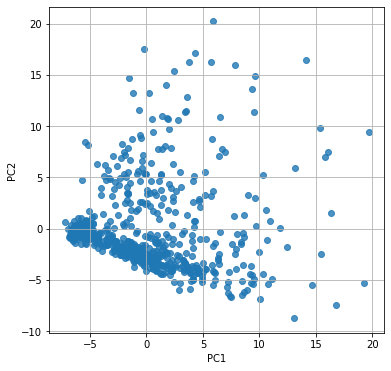

In [16]:
import sklearn 
from sklearn.decomposition import PCA 

import matplotlib.pyplot as plt
%matplotlib inline

# 行列の正規化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

pca = PCA()
pca.fit(dfs)

feature = pca.transform(dfs)
print(df["name"].T.values.tolist())
print(feature[:, 0])
print(feature[:, 1])

x_axis = feature[:, 0]
y_axis = feature[:, 1]
x_axis = Series(x_axis)
y_axis = Series(y_axis)

df2 = pd.concat([df["name"], x_axis, y_axis], axis=1)
print(df2)
df2.to_csv("PCA_word2vec.csv")

plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha = 0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()